# Sentiment Analysis with Traditional Machine Learning

- This note is based on Text Analytics with Python Ch9 Senitment Analysis by Dipanjan Sarkar
- Logistic Regression
- Support Vector Machine (SVM)

## Import necessary depencencies

In [1]:
import pandas as pd
import numpy as np
#import text_normalizer as tn
#import model_evaluation_utils as meu
import nltk

np.set_printoptions(precision=2, linewidth=80)

## Load and normalize data

In [2]:
%%time
dataset = pd.read_csv('../data/movie_reviews.csv')

CPU times: user 363 ms, sys: 68.3 ms, total: 431 ms
Wall time: 1.84 s


In [3]:
# take a peek at the data
print(dataset.head())
reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [4]:
type(reviews)
reviews.shape
sentiments.shape

(50000,)

In [5]:
# build train and test datasets
train_reviews = reviews[:35000]
train_sentiments = sentiments[:35000]
test_reviews = reviews[35000:]
test_sentiments = sentiments[35000:]

In [6]:
reviews[0][:100]
sentiments[0:10]
train_reviews[0][:100]
test_reviews[0][:100]
test_sentiments[0]

'negative'

## Normalizing the Corpus

In [7]:
# normalize datasets
# stop_words = nltk.corpus.stopwords.words('english')
# stop_words.remove('no')
# stop_words.remove('but')
# stop_words.remove('not')

# norm_train_reviews = tn.normalize_corpus(train_reviews, stopwords=stop_words)
# norm_test_reviews = tn.normalize_corpus(test_reviews, stopwords=stop_words)

In [8]:
norm_train_reviews = train_reviews
norm_test_reviews = test_reviews

## Traditional Supervised Machine Learning Models

- Logistic
- SVM

## Feature Engineering

In [9]:
%%time
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=5, max_df=0.7, ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_train_reviews)
# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=5, max_df=0.7, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_reviews)

CPU times: user 32.3 s, sys: 809 ms, total: 33.1 s
Wall time: 33.2 s


In [10]:
# transform test reviews into features
cv_test_features = cv.transform(norm_test_reviews)
tv_test_features = tv.transform(norm_test_reviews)

In [11]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (35000, 202778)  Test features shape: (15000, 202778)
TFIDF model:> Train features shape: (35000, 202778)  Test features shape: (15000, 202778)


## Model Training, Prediction and Performance Evaluation

In [12]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', max_iter=100)

:::{note}
`pd.MultiIndex()` has been updated in Sarker's code. The argument `codes=` is new.
:::

In [38]:
# functions from Text Analytics with Python book
def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))

def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  codes=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                codes=level_labels)) 
    print(cm_frame) 
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
    
def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, 
                                  classes=classes)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, 
                             classes=classes)
from sklearn import metrics

In [ ]:
# build model    
lr.fit(cv_train_features, train_sentiments)
# predict using model
lr_bow_predictions = lr.predict(cv_test_features) 

    
svm.fit(cv_train_features, train_sentiments)
svm_bow_predictions = svm.predict(cv_test_features)
    
# Logistic Regression model on BOW features
# lr_bow_predictions = meu.train_predict_model(classifier=lr, 
#                                              train_features=cv_train_features, train_labels=train_sentiments,
#                                              test_features=cv_test_features, test_labels=test_sentiments)

In [40]:
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_bow_predictions,
                                      classes=['positive','negative'])

/Users/Alvin/opt/anaconda3/envs/ckiptagger/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Performance metrics:
------------------------------
Accuracy: 0.905
Precision: 0.905
Recall: 0.905
F1 Score: 0.905

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.90      0.91      0.91      7510
    negative       0.91      0.90      0.90      7490

    accuracy                           0.91     15000
   macro avg       0.91      0.90      0.90     15000
weighted avg       0.91      0.91      0.90     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6804      706
        negative        719     6771


In [52]:
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_bow_predictions,
                                      classes=['positive','negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8981
Precision: 0.8983
Recall: 0.8981
F1 Score: 0.8981

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.91      0.89      0.90      7510
    negative       0.89      0.91      0.90      7490

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6649      861
        negative        668     6822


In [51]:
from sklearn.metrics import confusion_matrix
lr_bow_cm = confusion_matrix(test_sentiments, lr_bow_predictions)
svm_bow_cm = confusion_matrix(test_sentiments, svm_bow_predictions)
# lr_bow_cm.shape[1]
print(lr_bow_cm)
print(svm_bow_cm)


[[6771  719]
 [ 706 6804]]
[[6822  668]
 [ 861 6649]]


In [49]:
## MultiIndex DataFrame demo
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
# convert array to data frame
classes = ['positive','negative']
lr_bow_df_cm = pd.DataFrame(lr_bow_cm, 
                            index = pd.MultiIndex(levels=[['Actual'],classes],
                                                 codes=[[0,0],[0,1]]),
                            columns = pd.MultiIndex(levels=[['Predicted'],classes],
                                                 codes=[[0,0],[0,1]]))
lr_bow_df_cm

Predicted         
                 positive negative
Actual positive      6771      719
       negative       706     6804

In [46]:
# pd.MultiIndex(levels=[['Predicted:'],['positive', 'negative']],
#              codes=[[0,0],[1,0]])

MultiIndex([('Predicted:', 'negative'),
            ('Predicted:', 'positive')],
           )

In [47]:
# classes=['Positive','Negative']
# total_classes = len(classes)
# level_labels = [total_classes*[0], list(range(total_classes))]
# print(total_classes)
# print(level_labels)

In [48]:
svm_bow_df_cm = pd.DataFrame(svm_bow_cm, index = ['positive', 'negative'],
                  columns = ['positive', 'negative'])
svm_bow_df_cm

,positive,negative
positive,6822,668
negative,861,6649


<AxesSubplot:xlabel='None-None', ylabel='None-None'>

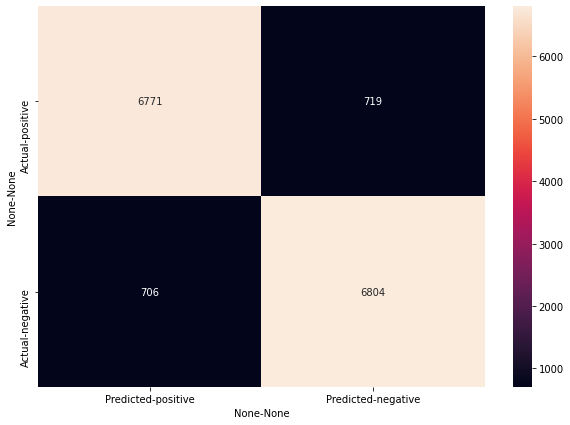

In [50]:
plt.figure(figsize = (10,7))
sn.heatmap(lr_bow_df_cm, annot=True, fmt='.5g')

<AxesSubplot:>

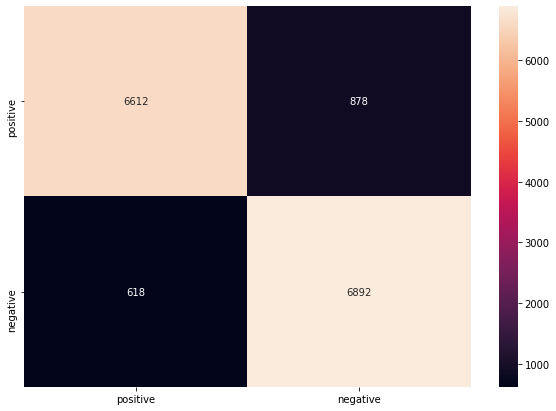

In [19]:
plt.figure(figsize = (10,7))
sn.heatmap(svm_bow_df_cm, annot=True, fmt='.5g')

In [20]:
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_bow_predictions,classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.905
Precision: 0.905
Recall: 0.905
F1 Score: 0.905

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.90      0.91      0.91      7510
    negative       0.91      0.90      0.90      7490

    accuracy                           0.91     15000
   macro avg       0.91      0.90      0.90     15000
weighted avg       0.91      0.91      0.90     15000


Prediction Confusion Matrix:
------------------------------
          positive  negative
positive      6804       706
negative       719      6771


In [21]:
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_bow_predictions,classes=['positive', 'negative'])
    

Model Performance metrics:
------------------------------
Accuracy: 0.9003
Precision: 0.9007
Recall: 0.9003
F1 Score: 0.9002

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.89      0.92      0.90      7510
    negative       0.91      0.88      0.90      7490

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000


Prediction Confusion Matrix:
------------------------------
          positive  negative
positive      6892       618
negative       878      6612


In [22]:
# Logistic Regression model on TF-IDF features
# lr_tfidf_predictions = meu.train_predict_model(classifier=lr, 
#                                                train_features=tv_train_features, train_labels=train_sentiments,
#                                                test_features=tv_test_features, test_labels=test_sentiments)
#meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_tfidf_predictions,
#                                      classes=['positive', 'negative'])

In [23]:
# svm_bow_predictions = meu.train_predict_model(classifier=svm, 
#                                              train_features=cv_train_features, train_labels=train_sentiments,
#                                              test_features=cv_test_features, test_labels=test_sentiments)
# meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_bow_predictions,
#                                       classes=['positive', 'negative'])

In [24]:
# svm_tfidf_predictions = meu.train_predict_model(classifier=svm, 
#                                                 train_features=tv_train_features, train_labels=train_sentiments,
#                                                 test_features=tv_test_features, test_labels=test_sentiments)
# # meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_tfidf_predictions,
#                                       classes=['positive', 'negative'])